In [24]:
# imports all librabies 

import numpy as np 
import pandas as pd 
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

with open('rideshare_kaggle.csv', mode='r') as file:

    csv_reader = csv.reader(file)

    next (csv_reader, None)

In [25]:
# called main DataFrame

data_frame = pd.read_csv('rideshare_kaggle.csv')
data_frame.head()




,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [26]:
# define all Sub Frames
source_counts = data_frame.groupby(['source', 'cab_type'])['id'].count().unstack().fillna(0)
destination_counts = data_frame.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

# Convert the timestamp column to datetime
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'], unit='s')

# Count rides by hour for both Uber and Lyft
hourly_counts = data_frame.groupby([data_frame['timestamp'].dt.hour, 'cab_type'])['id'].count().unstack().fillna(0)


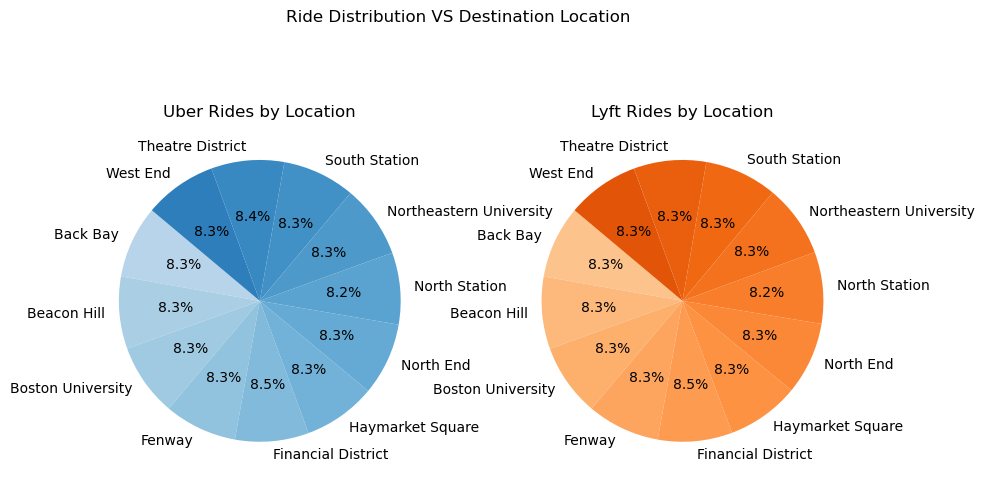

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Count rides by destination location for both Uber and Lyft
destination_counts = data_frame.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

# Sum all Uber and Lyft rides across all locations
total_counts = destination_counts.sum()

# Calculate the proportion of each location within Uber and Lyft
uber_proportions = destination_counts['Uber'] / total_counts['Uber']
lyft_proportions = destination_counts['Lyft'] / total_counts['Lyft']

# Create a figure
plt.figure(figsize=(10, 6))

# Pie chart for Uber
plt.subplot(1, 2, 1)
plt.pie(uber_proportions,
        labels=destination_counts.index,
        colors=plt.cm.Blues(np.linspace(0.3, 0.7, len(uber_proportions))),
        autopct='%1.1f%%',
        startangle=140)
plt.title('Uber Rides by Location')

# Pie chart for Lyft
plt.subplot(1, 2, 2)
plt.pie(lyft_proportions,
        labels=destination_counts.index,
        colors=plt.cm.Oranges(np.linspace(0.3, 0.7, len(lyft_proportions))),
        autopct='%1.1f%%',
        startangle=140)
plt.title('Lyft Rides by Location')

plt.suptitle('Ride Distribution VS Destination Location')
plt.show()

In [28]:
import scipy.stats as stats

# Create the contingency table
contingency_table = source_counts.T

# Perform the Chi-Square Test of Independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant association between the cab type and source location.")
else:
    print("There is no statistically significant association between the cab type and source location.")

Chi-Square Statistic: 2.2519199181139564
p-value: 0.9973970136861263
Degrees of Freedom: 11
Expected Frequencies:
[[25633.33790622 25460.79900039 25620.91865336 25617.81384014
  26105.7130597  25608.49940049 25620.47510861 25334.38874805
  25617.3702954  25614.70902693 25642.65234586 25531.32261485]
 [32158.66209378 31942.20099961 32143.08134664 32139.18615986
  32751.2869403  32127.50059951 32142.52489139 31783.61125195
  32138.6297046  32135.29097307 32170.34765414 32030.67738515]]
There is no statistically significant association between the cab type and source location.


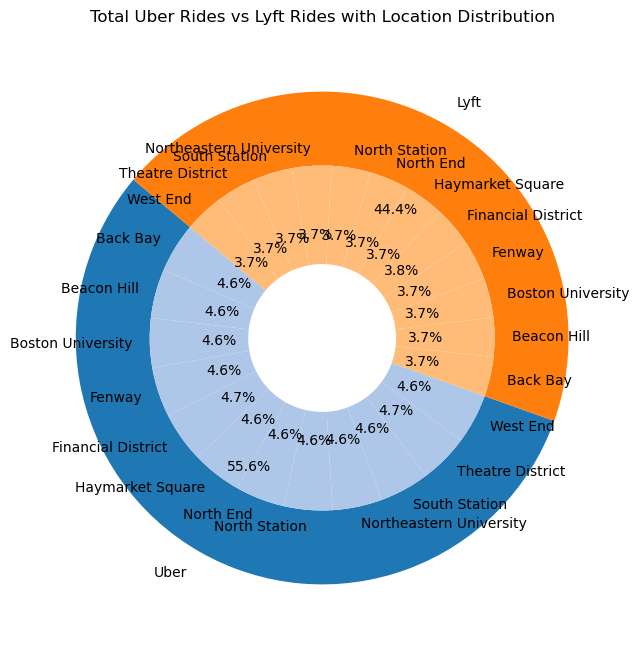

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming destination_counts has already been calculated and contains the total rides per destination
# Sum all Uber and Lyft rides across all locations
total_counts = destination_counts.sum()

# Labels for the outer ring (Uber and Lyft)
outer_labels = ['Uber', 'Lyft']

# Sizes of each slice in the outer pie chart (total rides for Uber and Lyft)
outer_sizes = [total_counts['Uber'], total_counts['Lyft']]

# Colors for Uber and Lyft in the outer ring
outer_colors = ['#1f77b4', '#ff7f0e']  # Blue for Uber, Orange for Lyft

# Create labels and sizes for the inner pie chart (locations within Uber and Lyft)
inner_labels = np.concatenate([destination_counts.index, destination_counts.index])
inner_sizes = np.concatenate([destination_counts['Uber'], destination_counts['Lyft']])

# Assign colors: light yellow for Uber locations and light blue for Lyft locations
inner_colors = ['#aec7e8'] * len(destination_counts.index) + ['#ffbb78'] * len(destination_counts.index)

# Create a figure
plt.figure(figsize=(8, 8))

# Create the outer pie chart (Uber vs Lyft)
plt.pie(outer_sizes,
        labels=outer_labels,
        colors=outer_colors,
        radius=1,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops=dict(width=0.3))  # Outer ring width

# Create the inner pie chart (locations within Uber and Lyft)
plt.pie(inner_sizes,
        labels=inner_labels,
        colors=inner_colors,
        radius=0.7,
        startangle=140,
        autopct='%1.1f%%',
        wedgeprops=dict(width=0.4))  # Inner ring width

plt.title('Total Uber Rides vs Lyft Rides with Location Distribution')
plt.show()